##基礎演習S 後半第3回

NE21-1228F
鈴木　拓己

In [3]:
if(!require("magrittr")){install.packages("magrittr")}; library(magrittr)
if(!require("rvest")){install.packages("rvest")}; library(rvest)
if(!require("stringr")){install.packages("stringr")}; library(stringr)
if(!require("leaflet")){install.packages("leaflet")}; library(leaflet)
if(!require("htmlwidgets")){install.packages("htmlwidgets")}; library(htmlwidgets)
if(!require("maptools")){install.packages("maptools")}; library(maptools)
if(!require("classInt")){install.packages("classInt")}; library(classInt)
if(!require("RColorBrewer")){install.packages("RColorBrewer")}; library(RColorBrewer)
if(!require("rgdal")){install.packages("rgdal")}; library(rgdal)

In [4]:
# 「IPA」フォントをインストール
system("apt-get install -y fonts-ipafont")
# フォント一覧を表示
# systemfonts::system_fonts()
# グラフィクスパラメータのフォントファミリーをIPAGothicとする
par(family="IPAGothic")

### Ex. 3-2　地図表示―2次元（多角形：polygon）
##### 【問題】
　例題3-2と同様にして，新型コロナウイルス感染症（COVID-19）の日本の都道府県別感染者数を地図に表示したい．

　以下のページに掲載されている「累計感染者数」と「10万人当たり累計感染者数」をそれぞれ地図に表示して，簡潔なコメント（作成方法，気付きなど）をつけなさい．

　ただし，地図は，plotによるものとleafletによるものとし，styleを等間隔分類と等量分類の2種類とする．従って，合計で８枚の地図となる．ただし，leafletによるHTMLはファイルサイズが大きいので，提出する必要はありません（代わりに，主要部分を切り取った画像を示せばよいものとします）．なお，データの更新月日を付しておくこと．
*	https://uub.jp/cvd/cvd2.html
  
ヒント

　データの取得には，スクリプトを作ってスクレイピング（XPath使用）すればよい（難しくない）．（学習の観点からは）好ましくないが，エクセルへのコピペや手入力もあり得る．

その他

　（3密の観点から）人口密度と感染者数には関係あるだろうか？−Chal.3-5参照．あるいは，隣接する都道府県の感染者数には関係があるだろうか？


#2022年6月29日のデータ

In [88]:
# [1]	zipファイル解凍
system("apt -y install zip && unzip gadm36_JPN_shp.zip")    # zip解凍（含16ファイル）

OGR data source with driver: ESRI Shapefile 
Source: "/content/gadm36_JPN_1.shp", layer: "gadm36_JPN_1"
with 47 features
It has 10 fields


Object of class SpatialPolygonsDataFrame
Coordinates:
        min       max
x 122.93320 153.98694
y  24.04542  45.52279
Is projected: FALSE 
proj4string : [+proj=longlat +datum=WGS84 +no_defs]
Data attributes:
    GID_0              NAME_0             GID_1              NAME_1         
 Length:47          Length:47          Length:47          Length:47         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
  VARNAME_1          NL_NAME_1            TYPE_1           ENGTYPE_1        
 Length:47          Length:47          Length:47          Length:47         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
     CC_1              HASC_1         
 Length:47          Length:47         
 Class :character   Class :character  
 Mode  :character   Mode  :character  

[1] "Aichi"     "Akita"     "Aomori"    "Chiba"     "Ehime"     "Fukui"    
 [7] "Fukuoka"   "Fukushima" "Gifu"      "Gunma"     "Hiroshima" "Hokkaido" 
[13] "Hyōgo"     "Ibaraki"   "Ishikawa"  "Iwate"     "Kagawa"    "Kagoshima"
[19] "Kanagawa"  "Kochi"     "Kumamoto"  "Kyoto"     "Mie"       "Miyagi"   
[25] "Miyazaki"  "Nagano"    "Naoasaki"  "Nara"      "Niigata"   "Oita"     
[31] "Okayama"   "Okinawa"   "Osaka"     "Saga"      "Saitama"   "Shiga"    
[37] "Shimane"   "Shizuoka"  "Tochigi"   "Tokushima" "Tokyo"     "Tottori"  
[43] "Toyama"    "Wakayama"  "Yamagata"  "Yamaguchi" "Yamanashi"

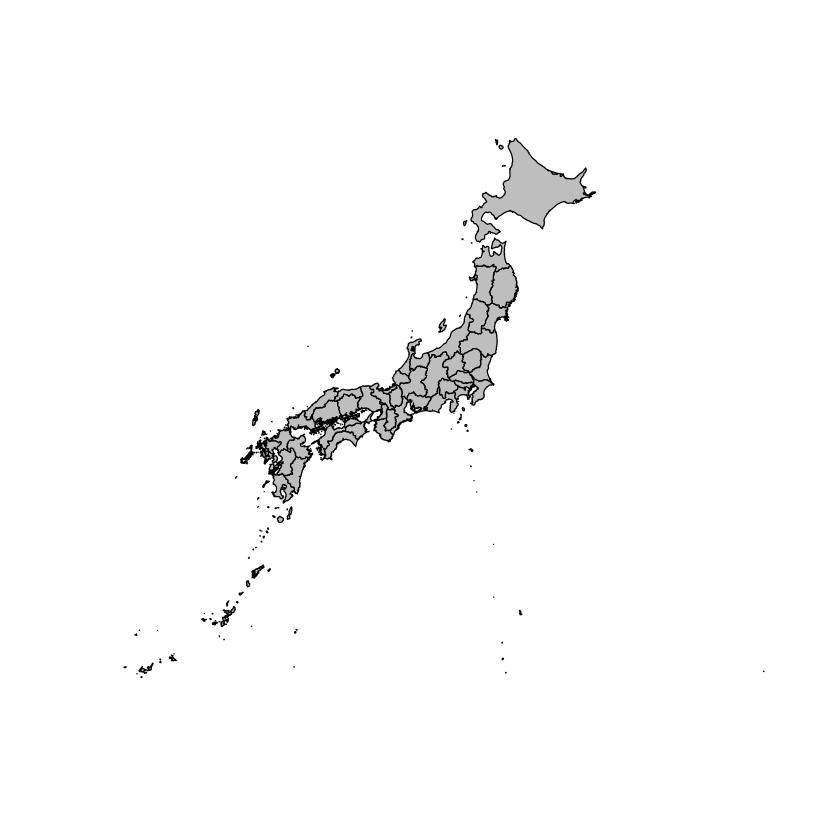

In [89]:
# [2]	地図データ（shapeファイル）の読み込み（都道府県のアルファベット順）
jpn <- readOGR("gadm36_JPN_1.shp", stringsAsFactors = FALSE)
plot(jpn, col="grey")				# col色でjpnのpolygonプロット
summary(jpn)					      # jpnのデータ部分の要約（NAME_1等を参照）
jpn@data$NAME_1	

In [90]:
library(rvest)
library(magrittr)

url <- "https://uub.jp/cvd/cvd2.html"
dat <- read_html(url)
#dat
XPath <-"//td[@class='al']/a"
place <- html_nodes(dat,xpath=XPath)	

place_name <- html_text(place)
place_name <- place_name[1:47]
place_name

XPath2 <-"//td[@class='bpdrr1']"
Cumulative_infect <- html_nodes(dat,xpath=XPath2)	


Cumulative_infect_num <- html_text(Cumulative_infect)
Cumulative_infect_num <- gsub(",","",Cumulative_infect_num,perl=TRUE);
Cumulative_infect_num <- as.integer(Cumulative_infect_num); Cumulative_infect_num



XPath3 <-"//td[10]"
Cumulative10_infect <- html_nodes(dat,xpath=XPath3)	

Cumulative10_infect_num <- html_text(Cumulative10_infect)
Cumulative10_infect_num <- Cumulative10_infect_num[2:48]
Cumulative10_infect_num <- gsub(",","",Cumulative10_infect_num,perl=TRUE);
Cumulative10_infect_num <- as.numeric(Cumulative10_infect_num); Cumulative10_infect_num


length(place_name)
length(Cumulative_infect_num)
length(Cumulative10_infect_num)

[1] "北海道"   "青森県"   "岩手県"   "宮城県"   "秋田県"   "山形県"  
 [7] "福島県"   "茨城県"   "栃木県"   "群馬県"   "埼玉県"   "千葉県"  
[13] "東京都"   "神奈川県" "新潟県"   "富山県"   "石川県"   "福井県"  
[19] "山梨県"   "長野県"   "岐阜県"   "静岡県"   "愛知県"   "三重県"  
[25] "滋賀県"   "京都府"   "大阪府"   "兵庫県"   "奈良県"   "和歌山県"
[31] "鳥取県"   "島根県"   "岡山県"   "広島県"   "山口県"   "徳島県"  
[37] "香川県"   "愛媛県"   "高知県"   "福岡県"   "佐賀県"   "長崎県"  
[43] "熊本県"   "大分県"   "宮崎県"   "鹿児島県" "沖縄県"

[1]  381115   63594   37967   93734   32067   30441   66594  164847   93930
[10]   98111  568503  463409 1595301  779148   75596   40058   59967   38941
[19]   34469   77563  107441  179011  569410   87069   95229  211936 1011988
[28]  443281   94478   44463   16452   19225  104341  168625   49085   24415
[37]   50768   44364   30530  447531   56826   65652  110361   57921   58402
[46]   93167  251832

[1]  7354.9  5207.1  3173.8  4093.1  3393.7  2886.1  3674.8  5779.8  4888.2
[10]  5093.2  7744.3  7378.5 11385.7  8435.6  3472.7  3906.5  5329.7  5122.4
[19]  4280.1  3814.9  5480.4  4963.6  7576.0  4960.0  6752.1  8274.4 11490.4
[28]  8159.7  7182.7  4867.2  2999.1  2891.8  5562.6  6067.1  3697.7  3429.8
[37]  5389.2  3358.9  4463.1  8735.1  7052.8  5063.2  6387.0  5200.5  5504.6
[46]  5911.3 17148.6

[1] 47

[1] 47

[1] 47

In [91]:
dataframe_Cumulative <- data.frame(place_name,Cumulative_infect_num); #dataframe_Cumulative
colnames(dataframe_Cumulative) <- c("都道府県","累計感染者数")
dataframe_Cumulative10 <- data.frame(place_name,Cumulative10_infect_num); #dataframe_Cumulative10
colnames(dataframe_Cumulative10) <- c("都道府県","ten万人当り累計感染者数")

dataframe_Cumulative <- dataframe_Cumulative[order(dataframe_Cumulative$累計感染者数 , decreasing=T),]
dataframe_Cumulative10 <- dataframe_Cumulative10[order(dataframe_Cumulative10$ten万人当り累計感染者数 , decreasing=T),]

In [92]:
dataframe_Cumulative
dataframe_Cumulative10

,都道府県,累計感染者数
,<chr>,<int>
13,東京都,1595301
27,大阪府,1011988
14,神奈川県,779148
23,愛知県,569410
11,埼玉県,568503
12,千葉県,463409
40,福岡県,447531
28,兵庫県,443281
1,北海道,381115


,都道府県,ten万人当り累計感染者数
,<chr>,<dbl>
47,沖縄県,17148.6
27,大阪府,11490.4
13,東京都,11385.7
40,福岡県,8735.1
14,神奈川県,8435.6
26,京都府,8274.4
28,兵庫県,8159.7
11,埼玉県,7744.3
23,愛知県,7576.0


In [93]:
ej <- read.csv("prefecture.csv", as.is=T); ej	# アルファベット順（=地図Shapeファイル順）
id1 <- match(ej$日本語, dataframe_Cumulative$都道府県); id1	# 都道府県名でマッチング：データをShapeファイル順に
id2 <- match(ej$日本語, dataframe_Cumulative10$都道府県); id2	# 都道府県名でマッチング：データをShapeファイル順に
val1 <- dataframe_Cumulative$累計感染者数[id1]; val1
val2 <- dataframe_Cumulative10$ten万人当り累計感染者数[id2]; val2

英語,日本語
<chr>,<chr>
Aichi,愛知県
Akita,秋田県
Aomori,青森県
Chiba,千葉県
Ehime,愛媛県
Fukui,福井県
Fukuoka,福岡県
Fukushima,福島県
Gifu,岐阜県


[1]  4 42 29  6 37 39  7 27 16 18 13  9  8 14 30 40 34 23  3 43 15 11 24 22 31
[26] 25 28 20 26 32 17 10  2 33  5 19 46 12 21 45  1 47 38 36 44 35 41

[1]  9 42 24 10 43 26  4 39 21 27 16 11  7 18 23 44 22 17  5 33 15  6 30 35 20
[26] 37 28 12 40 25 19  1  2 13  8 14 46 29 31 41  3 45 36 32 47 38 34

[1]  569410   32067   63594  463409   44364   38941  447531   66594  107441
[10]   98111  168625  381115  443281  164847   59967   37967   50768   93167
[19]  779148   30530  110361  211936   87069   93734   58402   77563   65652
[28]   94478   75596   57921  104341  251832 1011988   56826  568503   95229
[37]   19225  179011   93930   24415 1595301   16452   40058   44463   30441
[46]   49085   34469

[1]  7576.0  3393.7  5207.1  7378.5  3358.9  5122.4  8735.1  3674.8  5480.4
[10]  5093.2  6067.1  7354.9  8159.7  5779.8  5329.7  3173.8  5389.2  5911.3
[19]  8435.6  4463.1  6387.0  8274.4  4960.0  4093.1  5504.6  3814.9  5063.2
[28]  7182.7  3472.7  5200.5  5562.6 17148.6 11490.4  7052.8  7744.3  6752.1
[37]  2891.8  4963.6  4888.2  3429.8 11385.7  2999.1  3906.5  4867.2  2886.1
[46]  3697.7  4280.1

###dataの収集はスクリプトを作りスクレイピングを行なった。今回は累計感染者数と10万人あたりの累計感染者数を示すため二つのデータフレーム（降順）のものを作り、mapを作成した。

##累計感染者数
##plot Style=等間隔分類

累計感染者数のため東京都いった人口の多い都道府県が目立った。他の県ではあまり変化がないため、感染者数の格差がとてもあると感じた。感染対策が行われたこそ、他の都道府県で感染爆発が起きなかったと推測できる。

style: equal
  one of 4,076,350,421 possible partitions of this variable into 11 classes
   [16452,159984)   [159984,303516)   [303516,447048)   [447048,590579) 
               33                 5                 2                 4 
  [590579,734111)   [734111,877643)  [877643,1021175) [1021175,1164706) 
                0                 1                 1                 0 
[1164706,1308238) [1308238,1451770) [1451770,1595301] 
                0                 0                 1 

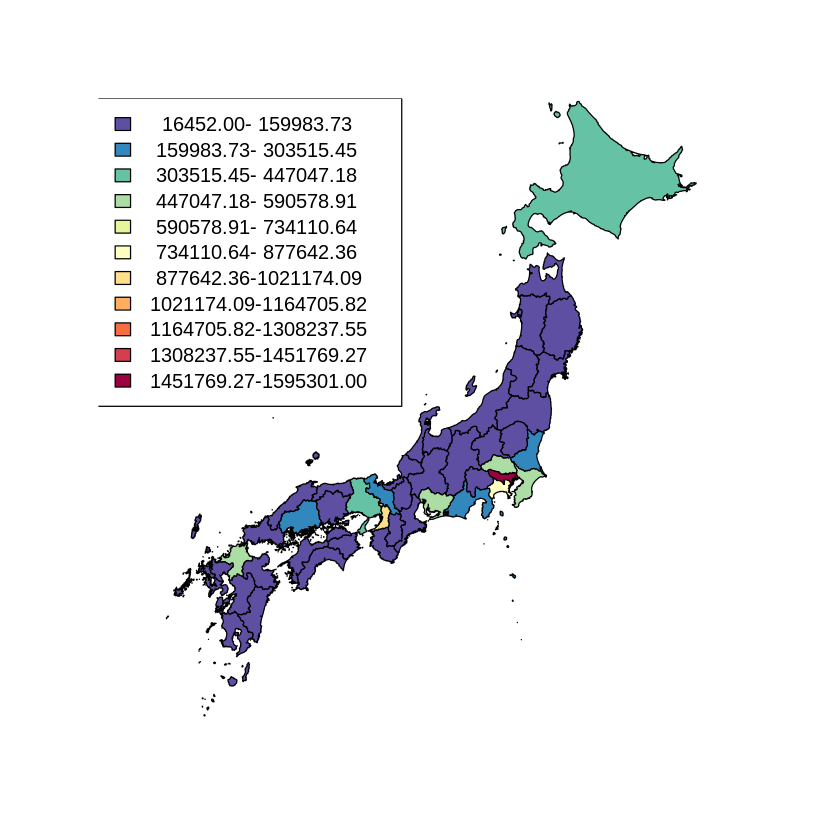

In [94]:
# [4] 色分けの級間隔(style)指定 ※ データと区間も
q_jpn <- classIntervals(val1, n=11, style="equal", dataPrecision=0)	# 等間隔分類
q_jpn
#－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－
# [5] カラーパレットの作成　※palは関数（値を色に対応）
pal <- colorBin("Spectral", domain = val1, bins = q_jpn$brks, reverse=T)
#－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－
# [6] 地図描画(1)（plot）
xlim <- c(130,145); ylim <- c(30,45) 
plot(jpn, xlim=xlim, ylim=ylim, col=pal(val1))	# 地図をプロット
# 凡例付加
addleg <- function(q, pal, ns, x, cex=1, ncol=1){     # 関数定義
  a <- q$brks[-length(q$brks)] %>% round(ns) %>% format(nsmall=ns)
  b <- q$brks[-1] %>% round(ns) %>% format(nsmall=ns)
  leg <- paste0(a, "-", b)
  legend(x=x, fill=pal(q$brks), cex=cex, ncol=ncol, legend=leg)
}
addleg(q=q_jpn, pal=pal, ns=2, x="topleft")

##累計感染者数
##lefret Style=等間隔分類

まず、plotと同じような地図が出力された。そのため地図の内容も同じように累計感染者数のため東京都いった人口の多い都道府県が目立った。他の県ではあまり変化がないため、感染者数の格差がとてもあると感じた。感染対策が行われたこそ、他の都道府県で感染爆発が起きなかったと推測できる。

In [95]:
# [7] 地図描画(2)（leaflet）とhtml生成
m <- leaflet(jpn) %>% addProviderTiles(providers$CartoDB.PositronNoLabels) %>%
  setView(lng=138, lat=38, zoom=4.5) %>%
  addPolygons(weight=1, fillOpacity = 0.5, fillColor=~pal(val1)) %>%	# 離散色
  addLegend(pal = pal, values = ~val1, opacity = 0.5, title = "全国累計感染者数",
            position = "bottomright")
saveWidget(m, "CNInfectE.html")

##累計感染者数
##plot Style=等量分類

等間隔のものより等量分量の方が、日本全体の細かな感染者数を理解しやすいと感じた。多い都道府県が目立つのはもちろんだが感染者数の少ない都道府県もはっきりと現れ、視覚的にとてもわかりやすい地図となった。

style: quantile
  one of 4,076,350,421 possible partitions of this variable into 11 classes
   [16452,30810)    [30810,39348)    [39348,50003)    [50003,59541) 
               5                4                4                4 
   [59541,74778)    [74778,93752)    [93752,99811)   [99811,166565) 
               4                5                4                4 
 [166565,334104)  [334104,549396) [549396,1595301] 
               4                4                5 

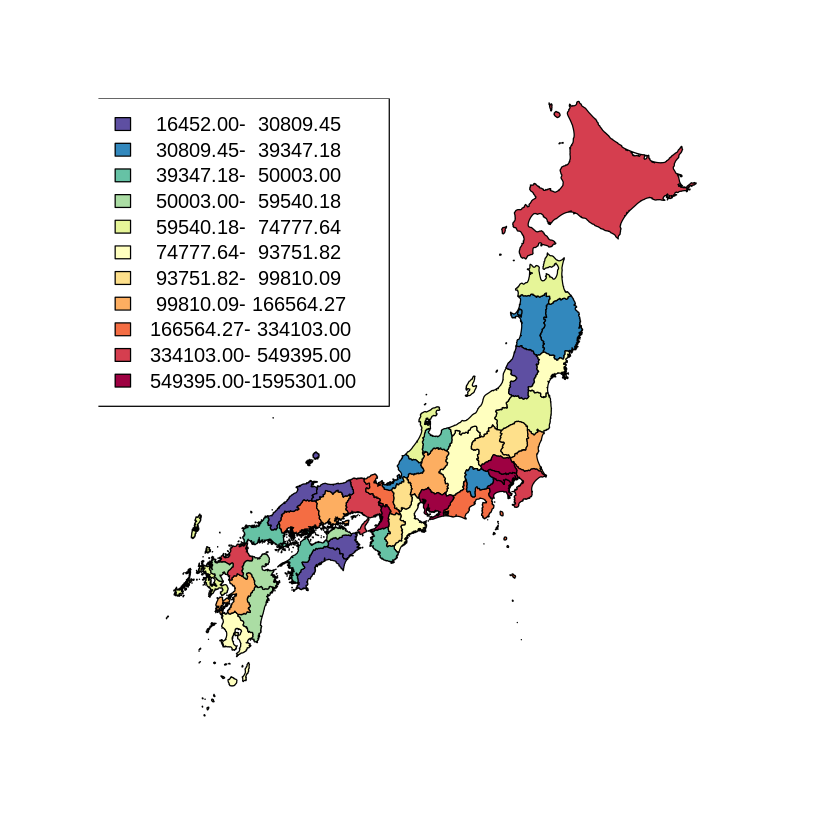

In [96]:
# [4] 色分けの級間隔(style)指定 ※ データと区間も
q_jpn <- classIntervals(val1, n=11, style="quantile", dataPrecision=0)	# 等間隔分類
q_jpn
#－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－
# [5] カラーパレットの作成　※palは関数（値を色に対応）
pal <- colorBin("Spectral", domain = val1, bins = q_jpn$brks, reverse=T)
#－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－
# [6] 地図描画(1)（plot）
xlim <- c(130,145); ylim <- c(30,45) 
plot(jpn, xlim=xlim, ylim=ylim, col=pal(val1))	# 地図をプロット
# 凡例付加
addleg <- function(q, pal, ns, x, cex=1, ncol=1){     # 関数定義
  a <- q$brks[-length(q$brks)] %>% round(ns) %>% format(nsmall=ns)
  b <- q$brks[-1] %>% round(ns) %>% format(nsmall=ns)
  leg <- paste0(a, "-", b)
  legend(x=x, fill=pal(q$brks), cex=cex, ncol=ncol, legend=leg)
}
addleg(q=q_jpn, pal=pal, ns=2, x="topleft")

##累計感染者数
##lefret Style=等量分類

plotと同じような地図が出力された。そのため地図に関する推測も等間隔のものより等量分量の方が、日本全体の細かな感染者数を理解しやすいと感じた。多い都道府県が目立つのはもちろんだが感染者数の少ない都道府県もはっきりと現れ、視覚的にとてもわかりやすい地図となった。

In [97]:
# [7] 地図描画(2)（leaflet）とhtml生成
m <- leaflet(jpn) %>% addProviderTiles(providers$CartoDB.PositronNoLabels) %>%
  setView(lng=138, lat=38, zoom=4.5) %>%
  addPolygons(weight=1, fillOpacity = 0.5, fillColor=~pal(val1)) %>%	# 離散色
  addLegend(pal = pal, values = ~val1, opacity = 0.5, title = "全国累計感染者数",
            position = "bottomright")
saveWidget(m, "CNInfectQ.html")

##10万人あたりの累計感染者数
##plot Style=等間隔分類

10万人あたりの累計感染者数は東京などの人口の多い地方を平らにして比較できていると感じた。南の方の都道府県が多少多くなっているため暑さによる感染対策の弱まりなどが推測できる。他にも人口密集地でも、細かな感染者数の変化を比較できた。

style: equal
  one of 4,076,350,421 possible partitions of this variable into 11 classes
  [2887,4183)   [4183,5480)   [5480,6776)   [6776,8073)   [8073,9370) 
           13            13             8             6             4 
 [9370,10666) [10666,11963) [11963,13259) [13259,14556) [14556,15853) 
            0             2             0             0             0 
[15853,17149] 
            1 

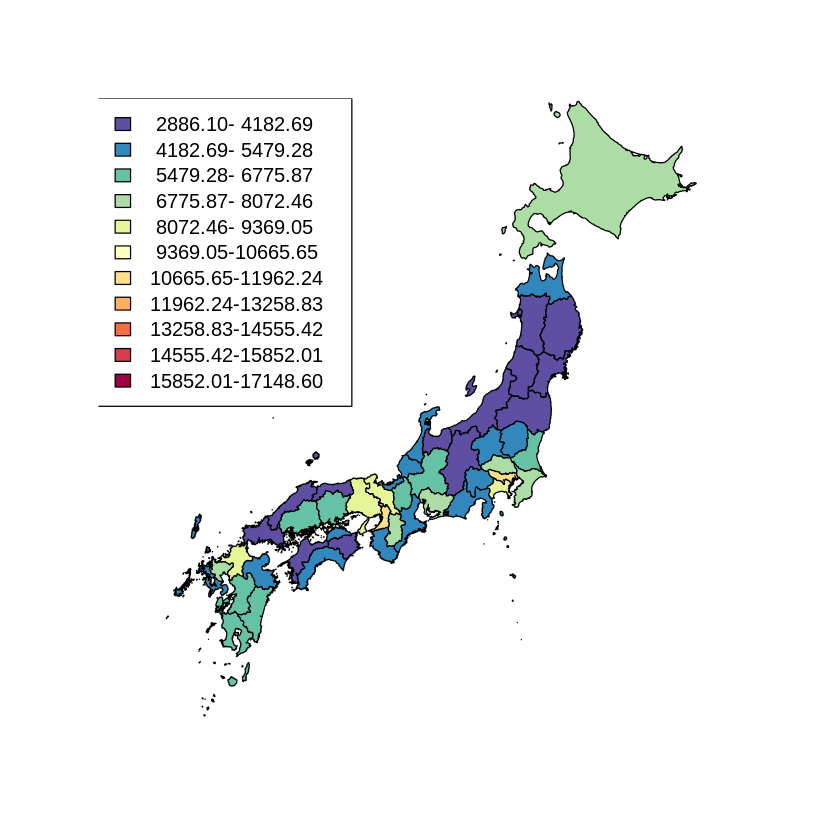

In [107]:
# [4] 色分けの級間隔(style)指定 ※ データと区間も
q_jpn <- classIntervals(val2, n=11, style="equal", dataPrecision=0)	# 等間隔分類
q_jpn
#－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－
# [5] カラーパレットの作成　※palは関数（値を色に対応）
pal <- colorBin("Spectral", domain = val2, bins = q_jpn$brks, reverse=T)
#－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－
# [6] 地図描画(1)（plot）
xlim <- c(130,145); ylim <- c(30,45) 
plot(jpn, xlim=xlim, ylim=ylim, col=pal(val2))	# 地図をプロット
# 凡例付加
addleg <- function(q, pal, ns, x, cex=1, ncol=1){     # 関数定義
  a <- q$brks[-length(q$brks)] %>% round(ns) %>% format(nsmall=ns)
  b <- q$brks[-1] %>% round(ns) %>% format(nsmall=ns)
  leg <- paste0(a, "-", b)
  legend(x=x, fill=pal(q$brks), cex=cex, ncol=ncol, legend=leg)
}
addleg(q=q_jpn, pal=pal, ns=2, x="topleft")

##10万人あたりの累計感染者数
##lefret Style=等間隔分類

plotと同じような結果を得ることができた。考察も10万人あたりの累計感染者数は東京などの人口の多い地方を平らにして比較できていると感じた。南の方の都道府県が多少多くなっているため暑さによる感染対策の弱まりなどが推測できる。他にも人口密集地でも、細かな感染者数の変化を比較できた。

In [108]:
# [7] 地図描画(2)（leaflet）とhtml生成
m <- leaflet(jpn) %>% addProviderTiles(providers$CartoDB.PositronNoLabels) %>%
  setView(lng=138, lat=38, zoom=4.5) %>%
  addPolygons(weight=1, fillOpacity = 0.5, fillColor=~pal(val2)) %>%	# 離散色
  addLegend(pal = pal, values = ~val2, opacity = 0.5, title = "10万人当り累計感染者数",
            position = "bottomright")
saveWidget(m, "CNInfect10E.html")

##10万人あたりの累計感染者数
##plot Style=等量分類

累計感染者数と同じように感染者数の少ない地方をより細かく比較することができた。10万人あたりで比較しているがやはり人口の多い都道府県が目立った。上の表には沖縄が一位だったがplotだと比較ができていないことがわかる。

style: quantile
  one of 4,076,350,421 possible partitions of this variable into 11 classes
 [2887,3366)  [3366,3684)  [3684,4196)  [4196,4941)  [4941,5120)  [5120,5398) 
           5            4            4            4            4            5 
 [5398,5816)  [5816,6889)  [6889,7505)  [7505,8407) [8407,17149] 
           4            4            4            4            5 

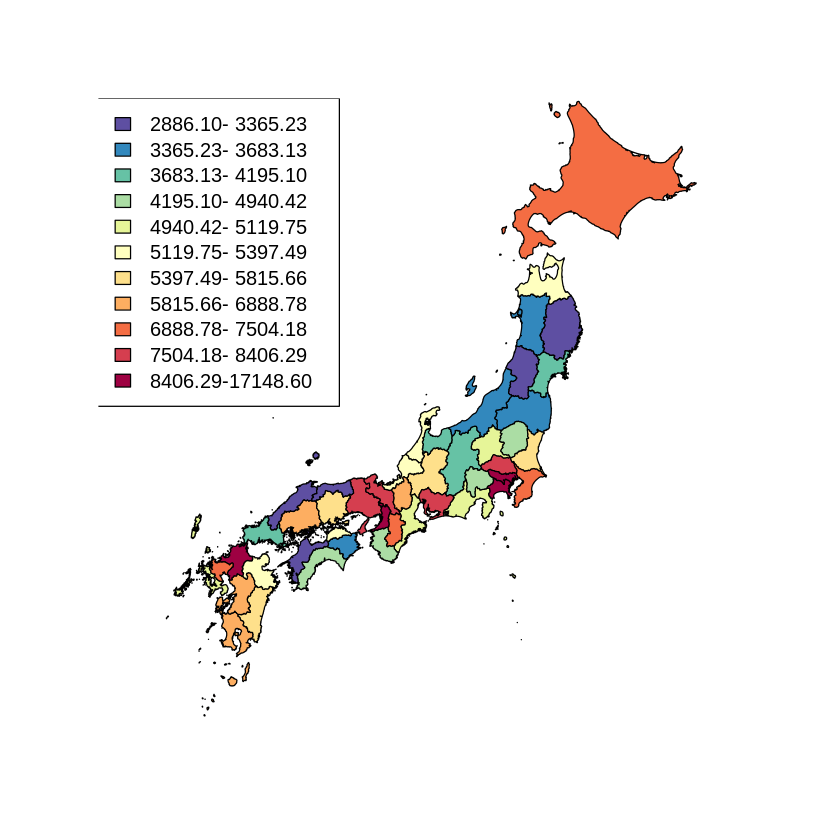

In [105]:
# [4] 色分けの級間隔(style)指定 ※ データと区間も
q_jpn <- classIntervals(val2, n=11, style="quantile", dataPrecision=0)	# 等間隔分類
q_jpn
#－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－
# [5] カラーパレットの作成　※palは関数（値を色に対応）
pal <- colorBin("Spectral", domain = val2, bins = q_jpn$brks, reverse=T)
#－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－
# [6] 地図描画(1)（plot）
xlim <- c(130,145); ylim <- c(30,45) 
plot(jpn, xlim=xlim, ylim=ylim, col=pal(val2))	# 地図をプロット
# 凡例付加
addleg <- function(q, pal, ns, x, cex=1, ncol=1){     # 関数定義
  a <- q$brks[-length(q$brks)] %>% round(ns) %>% format(nsmall=ns)
  b <- q$brks[-1] %>% round(ns) %>% format(nsmall=ns)
  leg <- paste0(a, "-", b)
  legend(x=x, fill=pal(q$brks), cex=cex, ncol=ncol, legend=leg)
}
addleg(q=q_jpn, pal=pal, ns=2, x="topleft")

##10万人あたりの累計感染者数
##lefret Style=等量分類

plotと同じ結果を得ることができた。しかし沖縄を含めた比較を行えた。考察も累計感染者数と同じように感染者数の少ない地方をより細かく比較することができた。10万人あたりで比較しているがやはり人口の多い都道府県が目立った。

In [106]:
# [7] 地図描画(2)（leaflet）とhtml生成
m <- leaflet(jpn) %>% addProviderTiles(providers$CartoDB.PositronNoLabels) %>%
  setView(lng=138, lat=38, zoom=4.5) %>%
  addPolygons(weight=1, fillOpacity = 0.5, fillColor=~pal(val2)) %>%	# 離散色
  addLegend(pal = pal, values = ~val2, opacity = 0.5, title = "10万人当り累計感染者数",
            position = "bottomright")
saveWidget(m, "CNInfect10Q.html")